# Case Study : Inference

Since this is the third case study we'll be doing, you have some idea of how things work now. The idea here is that we spent in class talking about inference and walking through some examples, and now it's your turn to do an inferential analysis!

Your goal is to, without much structure provided, consider what we've discussed in the course up to this point. Then, utilize the data provided to answer the question: *Do Pulitzers help newspapers keep readers?*, or more specifically *By looking at Pulitzer prizes awarded and changes in readership, can we determine what the effect of prestige is on the viewership at the 50 most popular newspapers between 2004 and 2013?*

The URL to the data for use in answering this question from FiveThirtyEight is https://raw.githubusercontent.com/fivethirtyeight/data/master/pulitzer/pulitzer-circulation-data.csv. 


# Part I : Setup & Data Wrangling

In this section you'll want to:
- import any packages you'll need for your analysis
    - a number are provided for you, but feel free to edit if there are other packages you want to use or changes to the input you want to make (Note: this is allowed in labs; in assignments you're limited to the imports we give you)
- read the dataset in
- understand what's going on in the data
    - how many observations?
    - what variables do you have? what variable types are here
    - which will you need to answer the question?

In [1]:
# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(font_scale=2, style="white")

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# set plotting size parameter
plt.rcParams['figure.figsize'] = (17, 7)

# import pandas & numpy library
import pandas as pd
import numpy as np

# Statmodels & patsy
import patsy
import statsmodels.api as sm

**Store the dataset (see URL above) in a variable called `pulitzer`** and take a look at the data.

In [2]:
# Get CSV directly from URL above
# YOUR CODE HERE
pulitzer = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/pulitzer/pulitzer-circulation-data.csv")

In [3]:
# get shape of dataset
assert pulitzer.shape == (50, 7)

In [4]:
# take a look at the data
pulitzer

,Newspaper,"Daily Circulation, 2004","Daily Circulation, 2013","Change in Daily Circulation, 2004-2013","Pulitzer Prize Winners and Finalists, 1990-2003","Pulitzer Prize Winners and Finalists, 2004-2014","Pulitzer Prize Winners and Finalists, 1990-2014"
0,USA Today,"2,192,098","1,674,306",-24%,1,1,2
1,Wall Street Journal,"2,101,017","2,378,827",+13%,30,20,50
2,New York Times,"1,119,027","1,865,318",+67%,55,62,117
3,Los Angeles Times,"983,727","653,868",-34%,44,41,85
4,Washington Post,"760,034","474,767",-38%,52,48,100
5,New York Daily News,"712,671","516,165",-28%,4,2,6
6,New York Post,"642,844","500,521",-22%,0,0,0
7,Chicago Tribune,"603,315","414,930",-31%,23,15,38
8,San Jose Mercury News,"558,874","583,998",+4%,4,2,6
9,Newsday,"553,117","377,744",-32%,12,6,18


Okay, so we can see the data here. Each row (observation) contains data about a different newspaper. It looks like we have information from 50 different newspapers. We ultimately want to look at the relationship between number of pulitzers won and readership. We'd like to see this over time, but we may be restricted to just comparing early 2000s with 2013. This is a limitation of the analysis, but a good place to start. Now, it's time to wrangle...

In [5]:
# why aren't daily circulation numbers in there?
pulitzer.dtypes

Newspaper                                          object
Daily Circulation, 2004                            object
Daily Circulation, 2013                            object
Change in Daily Circulation, 2004-2013             object
Pulitzer Prize Winners and Finalists, 1990-2003     int64
Pulitzer Prize Winners and Finalists, 2004-2014     int64
Pulitzer Prize Winners and Finalists, 1990-2014     int64
dtype: object

Ah, so circulation is an object....we want this to be numeric. Let's take care of that! **Convert the three Circulation columns to floats below.** Overwrite the data stored in those three columns (rather than creating any new columns).

In [6]:
# get rid of the commas in the numbers for Daily Circulation
# YOUR CODE HERE
pulitzer['Daily Circulation, 2004'] = pulitzer['Daily Circulation, 2004'].astype(str).str.replace(',', '').str.replace("%", "").astype(float)

pulitzer['Daily Circulation, 2013'] = pulitzer['Daily Circulation, 2013'].astype(str).str.replace(',', '').str.replace("%", "").astype(float)

pulitzer['Change in Daily Circulation, 2004-2013'] = pulitzer['Change in Daily Circulation, 2004-2013'].astype(str).str.replace(',', '').str.replace("%", "").astype(float)

In [7]:
# verify that that worked
pulitzer.dtypes

Newspaper                                           object
Daily Circulation, 2004                            float64
Daily Circulation, 2013                            float64
Change in Daily Circulation, 2004-2013             float64
Pulitzer Prize Winners and Finalists, 1990-2003      int64
Pulitzer Prize Winners and Finalists, 2004-2014      int64
Pulitzer Prize Winners and Finalists, 1990-2014      int64
dtype: object

In [8]:
assert(pulitzer['Daily Circulation, 2004'].dtype == float)
assert(pulitzer['Daily Circulation, 2013'].dtype == float)
assert(pulitzer['Change in Daily Circulation, 2004-2013'].dtype == float)

# Part II : EDA & Visualization

Once you understand your dataset, you'll want to:
- understand the relationships and trends for the variables in your dataset
- generate exploratory visualizations


In [9]:
# take a look at some descriptive statistics
# YOUR CODE HERE
print(pulitzer.describe(include='all'))

        Newspaper  Daily Circulation, 2004  Daily Circulation, 2013  \
count          50             5.000000e+01             5.000000e+01   
unique         50                      NaN                      NaN   
top     USA Today                      NaN                      NaN   
freq            1                      NaN                      NaN   
mean          NaN             4.624217e+05             3.624628e+05   
std           NaN             3.965849e+05             4.404812e+05   
min           NaN             2.157350e+05             0.000000e+00   
25%           NaN             2.598472e+05             1.617345e+05   
50%           NaN             3.400875e+05             2.293365e+05   
75%           NaN             4.909875e+05             3.733708e+05   
max           NaN             2.192098e+06             2.378827e+06   

        Change in Daily Circulation, 2004-2013  \
count                                50.000000   
unique                                     NaN 

Here we see that the mean daily circulation decreased from 2004 to 2013. This is in line with what we may expect, given reports that newspaper readership is decreasing in the age of the Internet. But, we also see that there is a fair amount of variability. This also makes sense, as some newspapers are much more popular than others. 

The change in daily circulation is important as well and we see that this number is negative, thus capturing the overall downward trend we expected in readership over this time period.

When we start to consider Pulitzter Prize winners we see that the mean number has varied from 8.3 in 1990-2003 to 6.7 in 2004-2014. We note that the final column combines these data across the time period of 1990-2014. 

Let's generate some plots to understand the overall distribution. Generate the plot you think best first the comments provided below

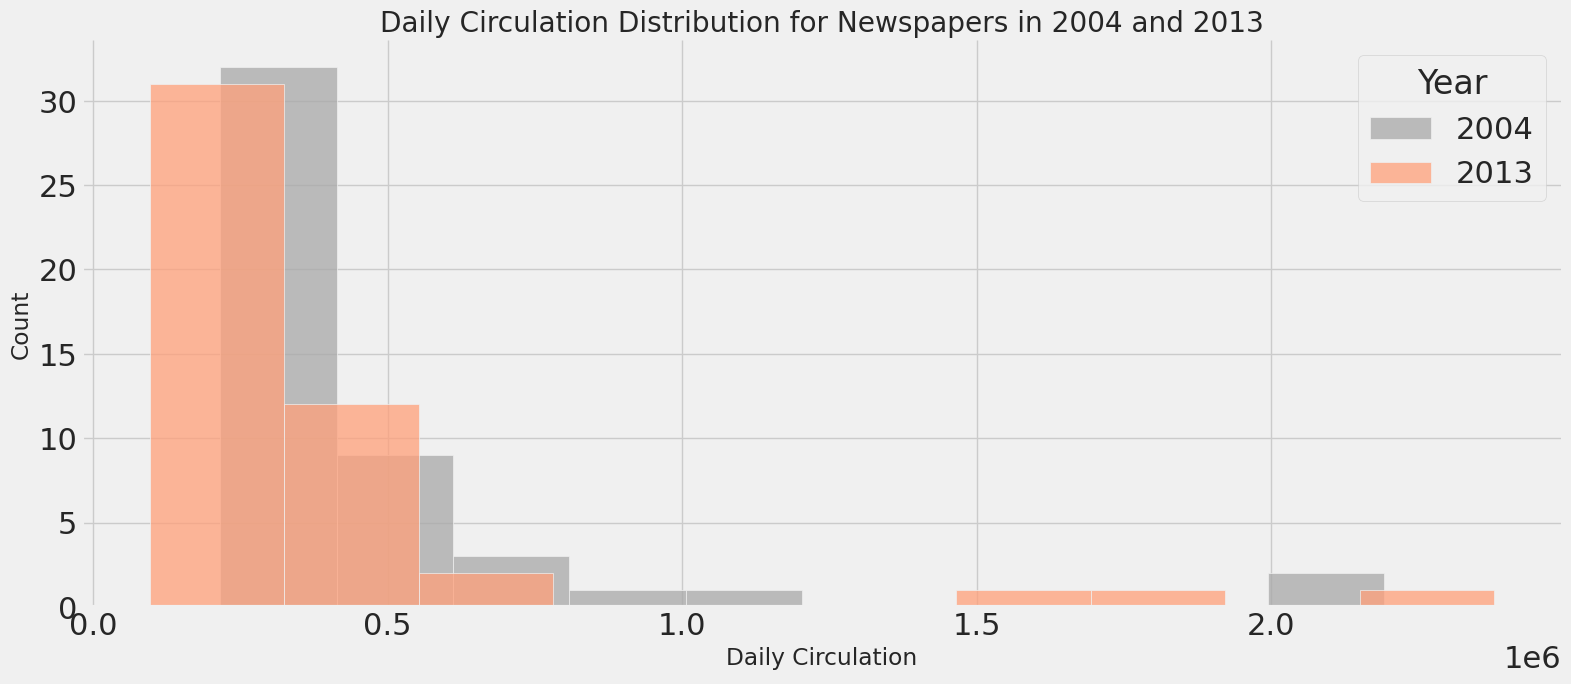

In [22]:
## look at daily circulation distribution in 2004 and in 2013
plt.rcParams['figure.figsize'] = (17, 7)

# YOUR CODE HERE
ax = sns.histplot(pulitzer['Daily Circulation, 2004'], bins=10, 
                  label = '2004', color='darkgrey', kde=False)
ax = sns.histplot(pulitzer['Daily Circulation, 2013'], bins=10, 
                  label = '2013', color='#FFA07A', kde=False)

# remove the top and right lines
sns.despine()

# add title and axis labels (modify x-axis label)
ax.set_title('Daily Circulation Distribution for Newspapers in 2004 and 2013')
ax.set_ylabel('Count')
ax.set_xlabel('Daily Circulation')
ax.legend(title="Year")

You should see that most newspapers have smaller readership bases, with a few outlier newspapers. Now, let's look at the distribution of Pulitzter prize winners for the same time period.

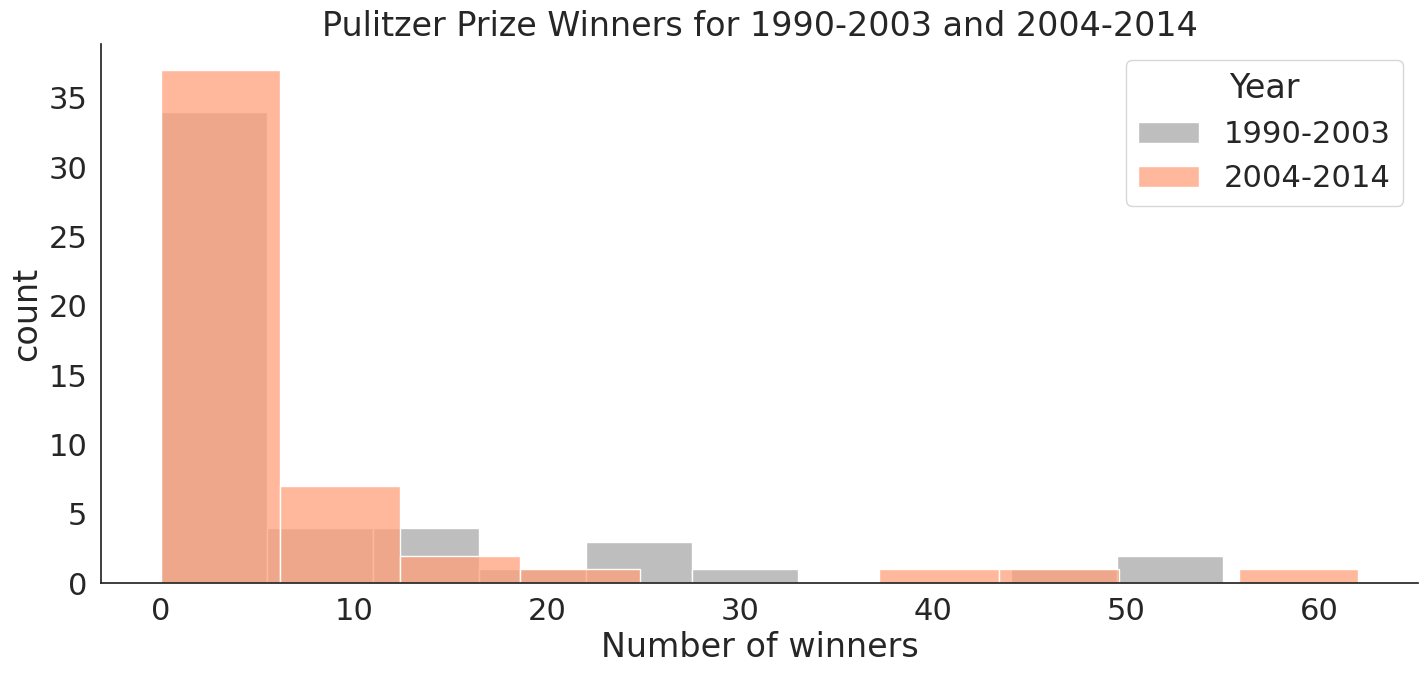

In [11]:
## look at pulitzer prize winner distributions for 1990-2003 and 2004-2014
# YOUR CODE HERE
ax = sns.histplot(pulitzer['Pulitzer Prize Winners and Finalists, 1990-2003'], bins=10, 
                  label = '1990-2003', color='darkgrey', kde=False)
ax = sns.histplot(pulitzer['Pulitzer Prize Winners and Finalists, 2004-2014'], bins=10, 
                  label = '2004-2014', color='#FFA07A', kde=False)

# remove the top and right lines
sns.despine()

# add title and axis labels (modify x-axis label)
ax.set_title('Pulitzer Prize Winners for 1990-2003 and 2004-2014')
ax.set_ylabel('count')
ax.set_xlabel('Number of winners')
ax.legend(title="Year")

Here, you should see that over the two time periods of interest the distributions look similar, although we note that we are only looking at the histogram for 50 newspapers, so our observations are limited. Nevertheless, most of the data clusters around 0, with ony a few newspapers receiving more than 20 pulitzers over the time periods we're interested in. These data are clearly not Normally distributed, but are skewed right...something we'll want to keep in mind when we analyze these data.

Text(0.5, 0, 'Percent of Chnage')

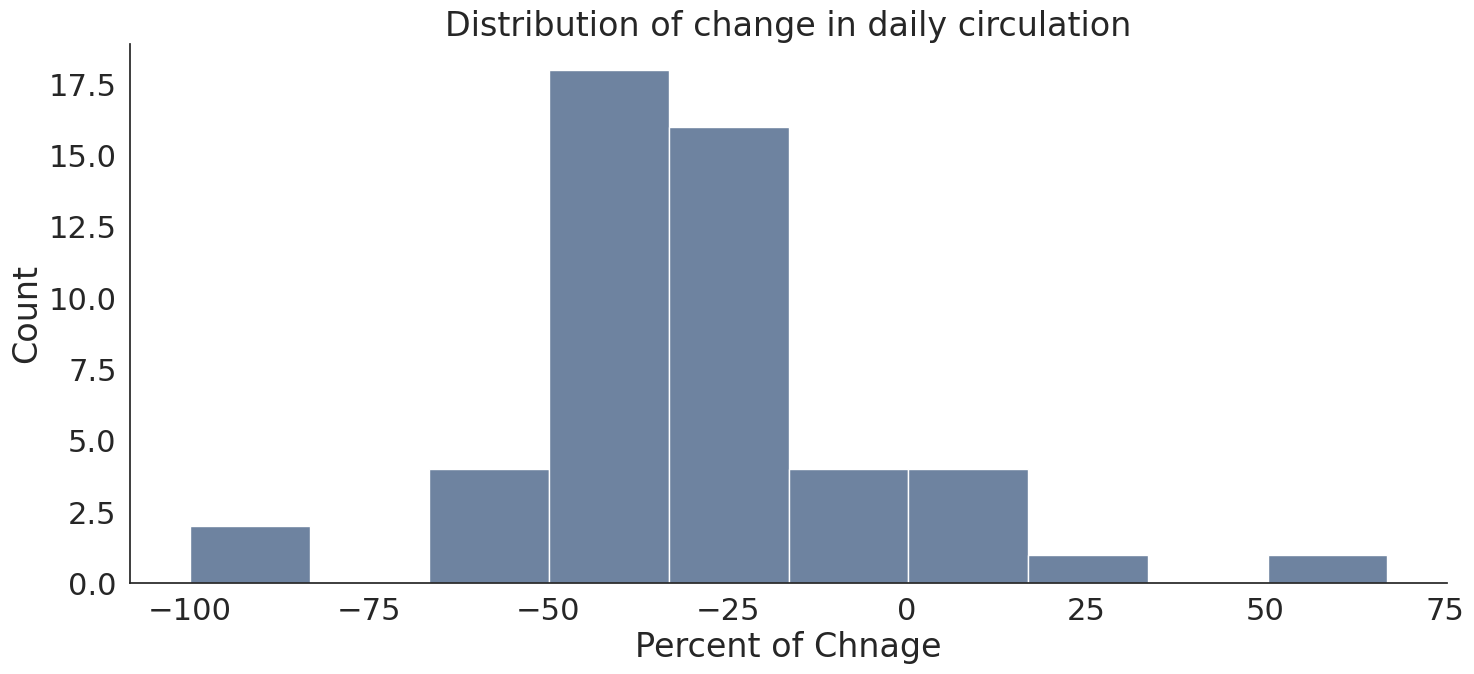

In [12]:
# plot the distribution of *change* in daily circulation
# YOUR CODE HERE
ax = sns.histplot(pulitzer['Change in Daily Circulation, 2004-2013'],  
                  bins=10, color='#3d5a80', kde=False)
# remove the top and right lines
sns.despine()

# add title and axis labels (modify x-axis label)
ax.set_title('Distribution of change in daily circulation')
ax.set_ylabel('Count')
ax.set_xlabel('Percent of Chnage')


Here we see our final univariate plot of interest. You should now see that while there is an overall downward trend in daily circulation (mean ~ -25), there are papers whose readership has increased. That outlier to the right, let's check out which paper that is...

(Hint: filter the dataframe to only include those that the 'Change in Daily Circulation, 2004-2013' is greater than 30 and set the filtered dataframe to a variable named `pulitzer_outlier_daily_circulation`)

In [13]:
# determine which paper has a positive change in circulation much larger than other papers
# YOUR CODE HERE
pulitzer_outlier_daily_circulation = pulitzer[pulitzer['Change in Daily Circulation, 2004-2013']>30]
pulitzer_outlier_daily_circulation

,Newspaper,"Daily Circulation, 2004","Daily Circulation, 2013","Change in Daily Circulation, 2004-2013","Pulitzer Prize Winners and Finalists, 1990-2003","Pulitzer Prize Winners and Finalists, 2004-2014","Pulitzer Prize Winners and Finalists, 1990-2014"
2,New York Times,1119027.0,1865318.0,67.0,55,62,117


In [14]:
assert pulitzer_outlier_daily_circulation.shape[0] == 1
assert pulitzer_outlier_daily_circulation['Newspaper'].iloc[0] == 'New York Times'

The paper you see above should make enough sense with your intution about popular publications. 

We also note that two newspapers have a -100 change in daily circulation. This is an interesting data point and something we want to investigate further. What's going on here? **Determine below which papers have -100 change in circulation.**

(Hint: filter the dataframe to only include those that the 'Change in Daily Circulation, 2004-2013' is less than -100 and set the filtered dataframe to a variable named `pulitzer_outlier_daily_circulation_2`)

In [15]:
# determine really large daily negative change in circulation
# YOUR CODE HERE
pulitzer_outlier_daily_circulation_2 = pulitzer[pulitzer['Change in Daily Circulation, 2004-2013'] < -99]
pulitzer_outlier_daily_circulation_2 

,Newspaper,"Daily Circulation, 2004","Daily Circulation, 2013","Change in Daily Circulation, 2004-2013","Pulitzer Prize Winners and Finalists, 1990-2003","Pulitzer Prize Winners and Finalists, 2004-2014","Pulitzer Prize Winners and Finalists, 1990-2014"
25,Rocky Mountain News,340007.0,0.0,-100.0,4,1,5
36,New Orleans Times-Picayune,262008.0,0.0,-100.0,5,3,8


In [16]:
assert pulitzer_outlier_daily_circulation_2.shape[0] == 2
assert 'Rocky Mountain News' in list(pulitzer_outlier_daily_circulation_2['Newspaper'])
assert 'New Orleans Times-Picayune' in list(pulitzer_outlier_daily_circulation_2['Newspaper'])

If we Google these papers we see that [Rocky Mountain News closed its doors in 2009](https://en.wikipedia.org/wiki/Rocky_Mountain_News). It makes sense that the readership decreased by -100 there. Now, what about New Orleans Times-Picayune? They [still have a website](https://www.nola.com/), so closure is not the same case here. When we dig a little deeper we see that [it is no longer published daily](https://en.wikipedia.org/wiki/The_Times-Picayune), explaining daily circulation having a measure of -100. We'll have to consider how to handle these data points. 

With that understanding of the readership numbers in our dataset, we'll continue our EDA to get a more specific understanding of the Pulitzer portion of the data. We now want to answer these questions before moving forward: 

1. What's a typical number of Pulitzers? What's that distribution look like?
1. Have the same newspapers consistently won more Pulitzers? 
2. Who has won the most Pulitzers? 
3. Anything look off?

**Generate the plots specified below, inspecting/understanding the output in each case.**

Text(0.5, 0, 'Number of winners')

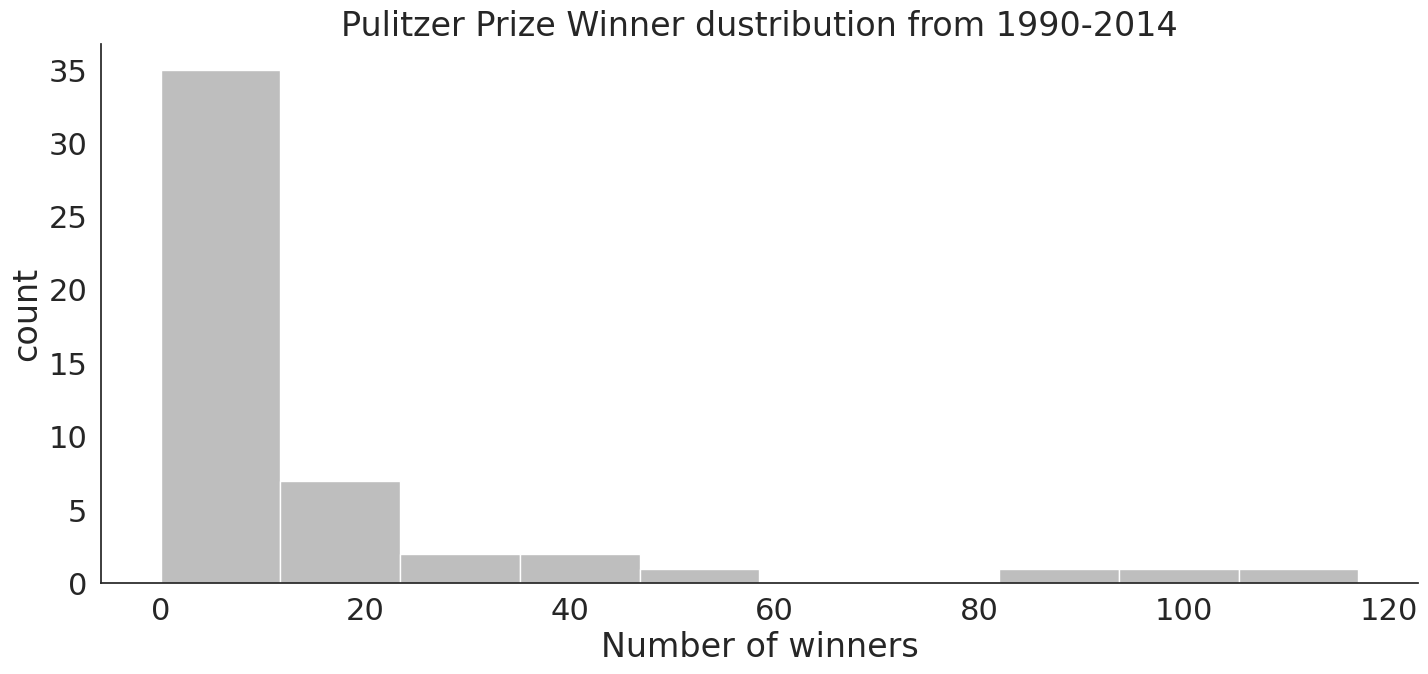

In [17]:
## look at pulitzer prize winner distributions from 1990-2014
# YOUR CODE HERE
ax = sns.histplot(pulitzer['Pulitzer Prize Winners and Finalists, 1990-2014'], bins=10, 
                  color='darkgrey', kde=False)
# remove the top and right lines
sns.despine()

# add title and axis labels (modify x-axis label)
ax.set_title('Pulitzer Prize Winner dustribution from 1990-2014')
ax.set_ylabel('count')
ax.set_xlabel('Number of winners')

Here you should see a distribution skewed right, with most publications receiving few awards and a few publications getting many more.

In [18]:
# determine which publications won a whole bunch of Pulitzers (>80)
# YOUR CODE HERE
pulitzer_winner_ountlier = pulitzer[pulitzer['Pulitzer Prize Winners and Finalists, 1990-2014'] >80]
pulitzer_winner_ountlier

,Newspaper,"Daily Circulation, 2004","Daily Circulation, 2013","Change in Daily Circulation, 2004-2013","Pulitzer Prize Winners and Finalists, 1990-2003","Pulitzer Prize Winners and Finalists, 2004-2014","Pulitzer Prize Winners and Finalists, 1990-2014"
2,New York Times,1119027.0,1865318.0,67.0,55,62,117
3,Los Angeles Times,983727.0,653868.0,-34.0,44,41,85
4,Washington Post,760034.0,474767.0,-38.0,52,48,100


Above you should see here that these three publications earned the most overall, and the most in each of the time periods specified. They've been around a while and have been the most successful at winning Pulitzers. Let's see that trend overall across all papers in our dataset.

**Look at the trend of Pulitzer Prize winners 1990-2003 compared with 2004-2014 to determine if papers have similar trend over time.**

Text(0.5, 0, 'Number of winners')

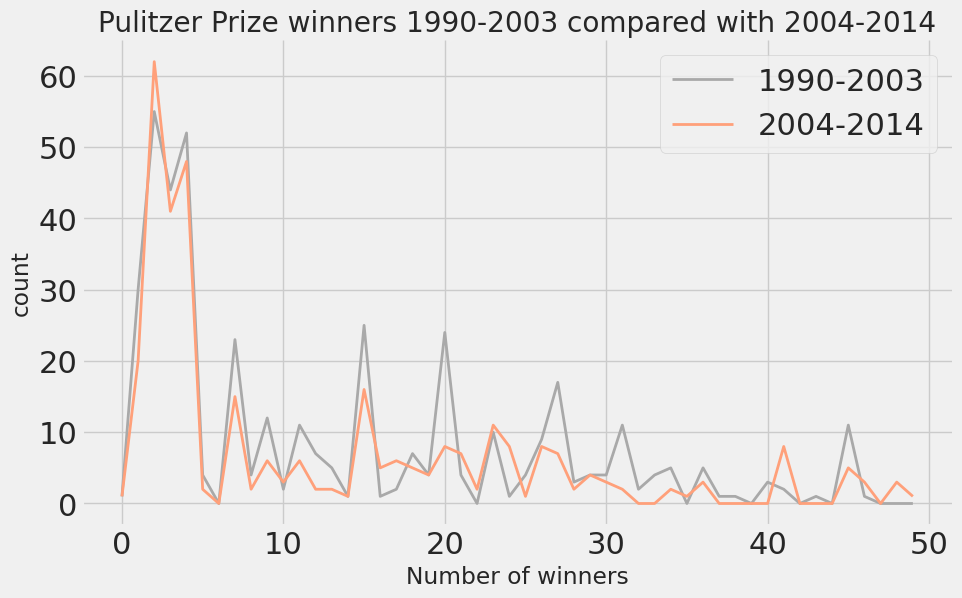

In [19]:
# use fivethirtyeight style
# mostly for fun ; data are from them
style.use('fivethirtyeight') 

# plot relationship between pulitzer prize winners/finalists in each time period
# YOUR CODE HERE
pulitzer_1990_2003 = pulitzer['Pulitzer Prize Winners and Finalists, 1990-2003']
pulitzer_2004_2014 = pulitzer['Pulitzer Prize Winners and Finalists, 2004-2014']

plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=pulitzer_1990_2003, color='darkgrey', linewidth=2, label="1990-2003")
ax = sns.lineplot(data=pulitzer_2004_2014, color='#FFA07A', linewidth=2, label="2004-2014")

sns.despine()

ax.set_title('Pulitzer Prize winners 1990-2003 compared with 2004-2014')
ax.set_ylabel('count')
ax.set_xlabel('Number of winners')

Ok, so generally here you should see the same papers winning the most Pulitzers in the 90's are the same as those winning those in the 2000s.

In [20]:
# who has won the most pulitzers during the years we're looking at? 
# YOUR CODE HERE
pulitzer_90_00=pulitzer[(pulitzer['Pulitzer Prize Winners and Finalists, 1990-2003']>54) & (pulitzer['Pulitzer Prize Winners and Finalists, 2004-2014']>60)]
pulitzer_90_00

,Newspaper,"Daily Circulation, 2004","Daily Circulation, 2013","Change in Daily Circulation, 2004-2013","Pulitzer Prize Winners and Finalists, 1990-2003","Pulitzer Prize Winners and Finalists, 2004-2014","Pulitzer Prize Winners and Finalists, 1990-2014"
2,New York Times,1119027.0,1865318.0,67.0,55,62,117


As we saw above, these papers should like come to mind as some of the most popular papers nationally, so there are no huge surprises here. The number of Puitzers is relatively consistent across the two time periods.

Before we carry out our analysis, we're going to **remove the papers no longer in daily circulation from our analysis, as their data won't accurately reflect the relationship. Store this output in `pulitzer` again.**

In [21]:
# filter out two non daily-circulation papers(filter out the ones that 'Change in Daily Circulation, 2004-2013' are less than or equal to -75).
# YOUR CODE HERE
pulitzer = pulitzer[pulitzer['Change in Daily Circulation, 2004-2013'] > -75]
pulitzer

,Newspaper,"Daily Circulation, 2004","Daily Circulation, 2013","Change in Daily Circulation, 2004-2013","Pulitzer Prize Winners and Finalists, 1990-2003","Pulitzer Prize Winners and Finalists, 2004-2014","Pulitzer Prize Winners and Finalists, 1990-2014"
0,USA Today,2192098.0,1674306.0,-24.0,1,1,2
1,Wall Street Journal,2101017.0,2378827.0,13.0,30,20,50
2,New York Times,1119027.0,1865318.0,67.0,55,62,117
3,Los Angeles Times,983727.0,653868.0,-34.0,44,41,85
4,Washington Post,760034.0,474767.0,-38.0,52,48,100
5,New York Daily News,712671.0,516165.0,-28.0,4,2,6
6,New York Post,642844.0,500521.0,-22.0,0,0,0
7,Chicago Tribune,603315.0,414930.0,-31.0,23,15,38
8,San Jose Mercury News,558874.0,583998.0,4.0,4,2,6
9,Newsday,553117.0,377744.0,-32.0,12,6,18


In [ ]:
assert pulitzer.shape == (48, 7)

**Let's take a look at the change in daily cirulation after removing these outliers.**

Text(0.5, 0, 'Percent of Chnage')

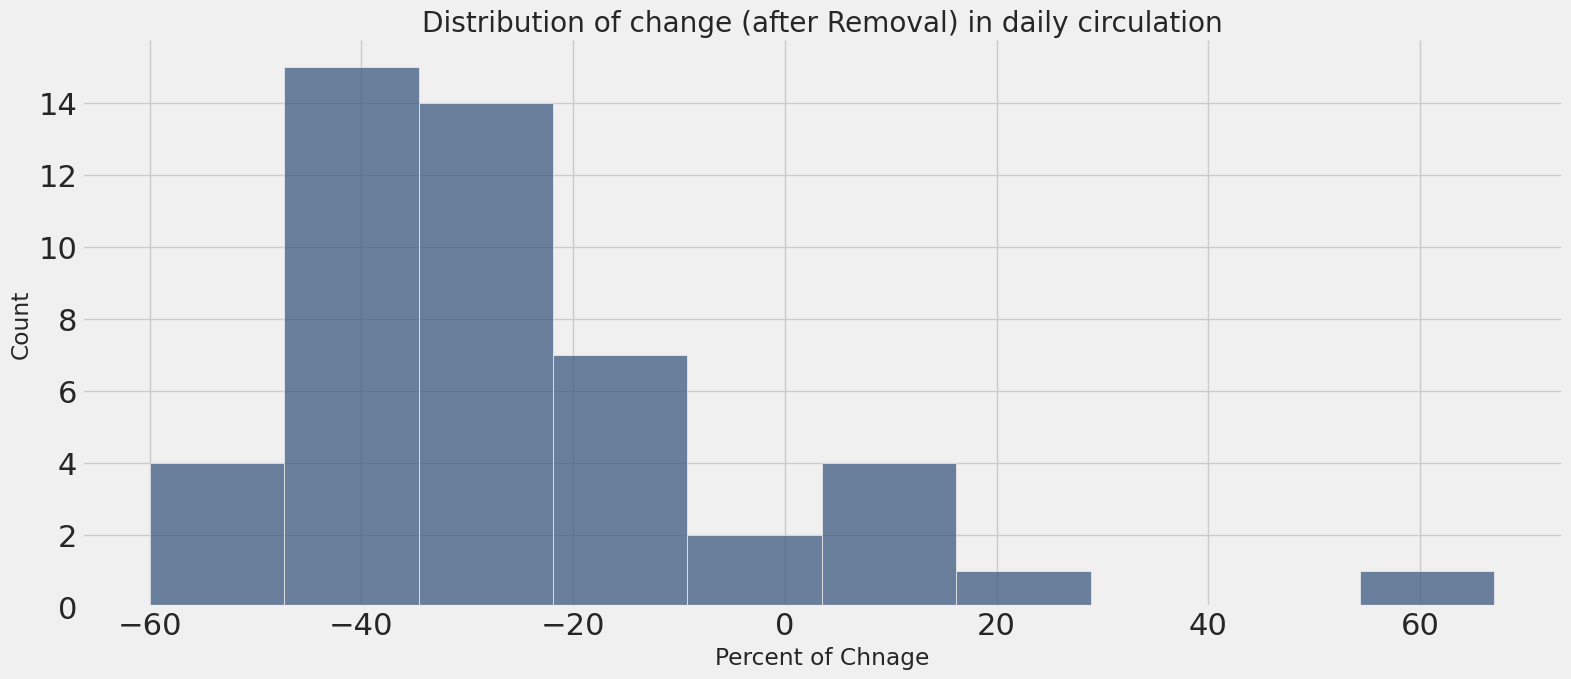

In [24]:
# plot the distribution of daily change in circulation after outlier removal
# YOUR CODE HERE
ax = sns.histplot(pulitzer['Change in Daily Circulation, 2004-2013'],  
                  bins=10, color='#3d5a80', kde=False)
# remove the top and right lines
sns.despine()

# add title and axis labels (modify x-axis label)
ax.set_title('Distribution of change (after Removal) in daily circulation')
ax.set_ylabel('Count')
ax.set_xlabel('Percent of Chnage')


Now, after removing those two papers, if you look at daily circulation, the data are closer to normally distributed, but we note there are still papers that are outliers at the high end of circulation papers. 

# Part III : Inferential Analysis

Finally, answer the question! Carry out the inferential analysis required to answer your question of interest!

**So, you could just plot the relationship between the Pulittzers and daily circulation across the years in this dataset to get a sense of what's going on.**

This will help us start to answer: Does winning more Pulitzers result in your readership changing less?

In [44]:
# Relationship between the total number of Pulitzers and change in readership (daily circulation)
# YOUR CODE HERE
pulitzer.loc[:, 'Change_in_Daily_Circulation'] = pulitzer['Change in Daily Circulation, 2004-2013']
pulitzer.loc[:, 'Pulitzer_Total'] = pulitzer['Pulitzer Prize Winners and Finalists, 1990-2014']

y, X = patsy.dmatrices('Change_in_Daily_Circulation ~ Pulitzer_Total', data=pulitzer)

model = sm.OLS(y, X).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:     Change_in_Daily_Circulation   R-squared:                       0.139
Model:                                     OLS   Adj. R-squared:                  0.121
Method:                          Least Squares   F-statistic:                     7.457
Date:                         Sat, 16 Nov 2024   Prob (F-statistic):            0.00893
Time:                                 06:40:42   Log-Likelihood:                -215.07
No. Observations:                           48   AIC:                             434.1
Df Residuals:                               46   BIC:                             437.9
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

What you should see here is that there appears to be some general positive relationship but note that there are outliers in circulation, where circulation is much higher than number of Pulitzers won as well as outliers in Pulitzers won. Overall, most of the data are clustered around zero Pulitzers.  This is because the distributions of both of our variables are skewed right. This suggests that we may need to transform these data to use linear regression to ensure that the large outlier values are not driving our relationship.

So, as discussed in class: **Apply a log10-transformation the Pulitzer count data, with an offset of 0.1** This will shift the values away from being centered near zero when put on the log scale. Store this in a new column `pulitzer_log10`.

In [50]:
# log transform with a 0.1 offset

# YOUR CODE HERE
pulitzer['pulitzer_log10'] = np.log10(pulitzer['Pulitzer_Total'] + 0.1)

pulitzer[['Pulitzer_Total', 'pulitzer_log10']].head(15)

/tmp/ipykernel_422/1278014893.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pulitzer['pulitzer_log10'] = np.log10(pulitzer['Pulitzer_Total'] + 0.1)


,Pulitzer_Total,pulitzer_log10
0,2,0.322219
1,50,1.699838
2,117,2.068557
3,85,1.929930
4,100,2.000434
5,6,0.785330
6,0,-1.000000
7,38,1.580925
8,6,0.785330
9,18,1.257679


Text(0.5, 0, 'Pulitzer Total of log10')

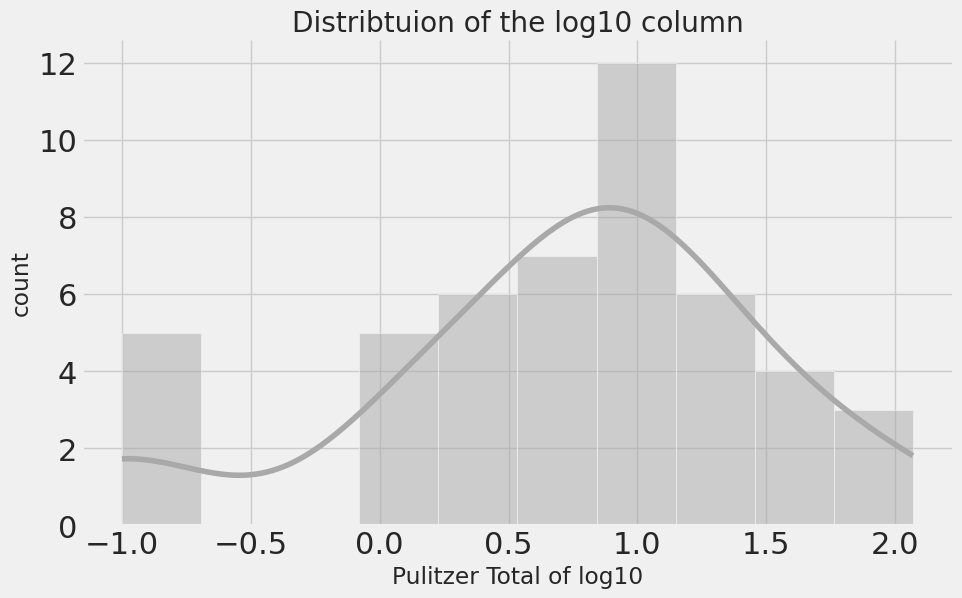

In [52]:
# visualize the distribtuion of the log10 column
# YOUR CODE HERE
plt.figure(figsize=(10,6))
ax = sns.histplot(pulitzer['pulitzer_log10'], bins=10, color='darkgrey', kde=True)
# remove the top and right lines
sns.despine()

# add title and axis labels (modify x-axis label)
ax.set_title('Distribtuion of the log10 column')
ax.set_ylabel('count')
ax.set_xlabel('Pulitzer Total of log10')

Well, the distribution should appear less skewed...but what's going on down around -1? Well, this is because there were zeroes in the original dataset (see below). Due to this we used an offset of 0.1 in the log transformation above. These zeroes all show up at -1 as the $log_{10}(0+0.1) = -1$. 

In [53]:
# this should show you all of the papers with zero pulitzer prizes
pulitzer[pulitzer['pulitzer_log10'] < 0]


,Newspaper,"Daily Circulation, 2004","Daily Circulation, 2013","Change in Daily Circulation, 2004-2013","Pulitzer Prize Winners and Finalists, 1990-2003","Pulitzer Prize Winners and Finalists, 2004-2014","Pulitzer Prize Winners and Finalists, 1990-2014",Change in Daily Circulation,Pulitzer Total,Change_in_Daily_Circulation,Pulitzer_Total,pulitzer_log10
6,New York Post,642844.0,500521.0,-22.0,0,0,0,-22.0,0,-22.0,0,-1.0
39,San Antonio Express-News,246057.0,139005.0,-44.0,0,0,0,-44.0,0,-44.0,0,-1.0
42,Tampa Tribune,238877.0,191477.0,-20.0,0,0,0,-20.0,0,-20.0,0,-1.0
44,Boston Herald,236899.0,95929.0,-60.0,0,0,0,-60.0,0,-60.0,0,-1.0
47,Daily Oklahoman,223403.0,124667.0,-44.0,0,0,0,-44.0,0,-44.0,0,-1.0


Now it's time to do our analysis!

First, **plot the relationship between our two variables of interest** - be sure to consider the assumptions of linear regression discussed in class and determine if linear regression is appropriate.

Then, if appropriate, **use linear regression to determine the effect of log 10 pulitzer on change in daily circulation and take a look at the results**

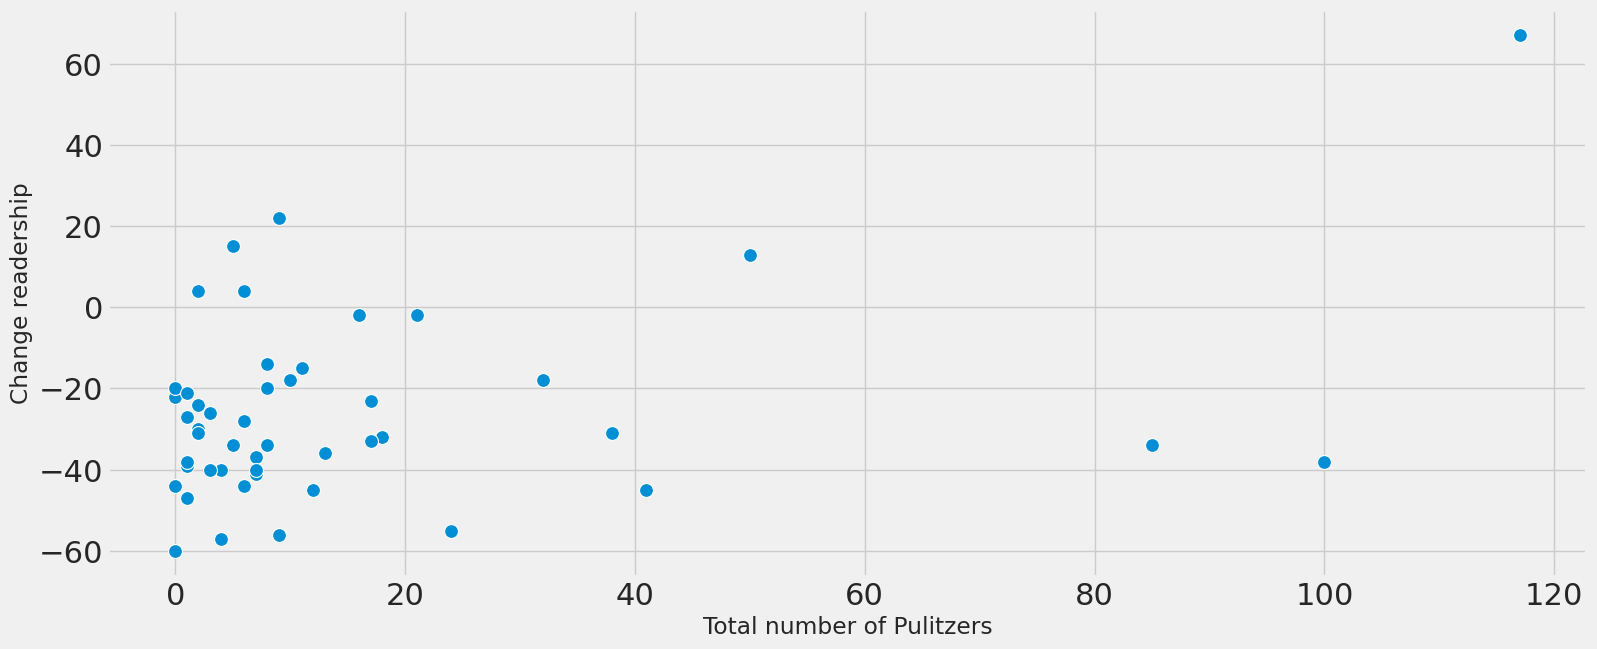

In [57]:
# plot relationship between the total number of Pulitzers and change readership
# YOUR CODE HERE
sns.scatterplot(x='Pulitzer Prize Winners and Finalists, 1990-2014', y='Change in Daily Circulation, 2004-2013', data=pulitzer, s=100)
plt.xlabel('Total number of Pulitzers')
plt.ylabel('Change readership');

<Figure size 2000x1500 with 0 Axes>

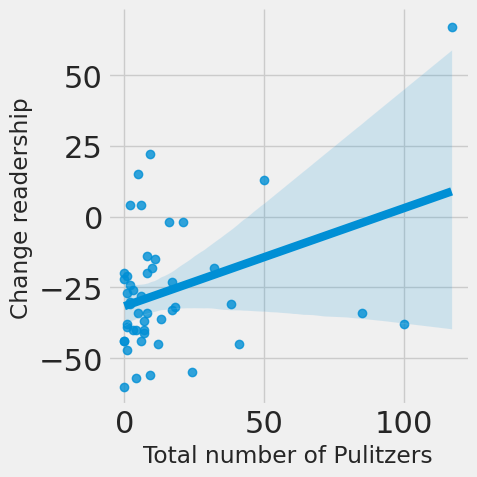

In [60]:
# carry out linear regression
# YOUR CODE HERE
sns.lmplot(x='Pulitzer Prize Winners and Finalists, 1990-2014', y='Change in Daily Circulation, 2004-2013', data=pulitzer)
plt.xlabel('Total number of Pulitzers')
plt.ylabel('Change readership');

Here, we can't directly interpret our $\beta_1$ estimate (`coef`) on our original scale above because we log-transformed our data. In order to interpet 8.83 (what your $\beta_1$ should be), we would say that for every one unit increase in the number of pulitzers a publication has, the viewership increases by `~(coef/100)`, which here would be (8.83/100)...or 0.0883. That effect is pretty small. This is further reflected in the p-value (0.04), which suggests that we would see these results, or something more extreme due to random chance alone approximately 4% of the time.

We can therefore conclude that based on the data we have over these two time periods, there is a significant relationship between the number of Pulitzers a publication wins and the papers readership but that effect is quite minimal. We also know that this analysis is likely failing to take into account the effect of confounders we discussed in class, limiting our confidence in this result.

Note, of course, there are limitations to this analysis. There are other measures of prestige _and_ other measures of readership (electronic-only, for instance), that could help to answer this question. All analyses have limitations. Here, we've just noted a few. Be sure to consider all limitations for your final projects and include them in your Jupyter Notebook reports.